# 📌 SSE Cost Function for Multivariate Linear Regression

- **Remembering SSE Cost Function** for multivariate linear regression:

$$
J(w) = \sum_{i=1}^{n} \left( y^{(i)} - h_w(x^{(i)}) \right)^2 = \sum_{i=1}^{n} \left( y^{(i)} - \mathbf{w}^T x^{(i)} \right)^2
$$

- **Matrix Form of the Problem**:

$$
\mathbf{X} =
\begin{bmatrix}
1 & x_1^{(1)} & \cdots & x_d^{(1)} \\
1 & x_1^{(2)} & \cdots & x_d^{(2)} \\
\vdots & \vdots & \ddots & \vdots \\
1 & x_1^{(n)} & \cdots & x_d^{(n)}
\end{bmatrix}
\quad
\mathbf{w} =
\begin{bmatrix}
w_0 \\
w_1 \\
\vdots \\
w_d
\end{bmatrix}
\quad
\mathbf{y} =
\begin{bmatrix}
y^{(1)} \\
\vdots \\
y^{(n)}
\end{bmatrix}
$$


# 📌 SSE Cost Function in Matrix Form

Given the dataset:

$$
\mathbf{X} =
\begin{bmatrix}
\text{age} & m^2 & \text{rooms} & \text{...}
\end{bmatrix}
$$

The prediction is:

$$
\hat{y} = \mathbf{X} \mathbf{w}
$$

We want to minimize the difference:

$$
J(w) = (\mathbf{y} - \hat{\mathbf{y}})^T (\mathbf{y} - \hat{\mathbf{y}})
$$

Since:

$$
|A|^2 = A^T A
$$

Expanding:

$$
J(w) = \mathbf{y}^T \mathbf{y} - \mathbf{y}^T \mathbf{X} \mathbf{w} - (\mathbf{y}^T \mathbf{X} \mathbf{w})^T + (\mathbf{X} \mathbf{w})^T (\mathbf{X} \mathbf{w})
$$

Using **transpose properties**:

$$
(A B)^T = B^T A^T
$$

Since:

$$
\mathbf{y} \text{ is } n \times 1
$$

$$
\mathbf{X} \text{ is } n \times d
$$

$$
\mathbf{w} \text{ is } d \times 1
$$
Thus:

$$
J(w) = \mathbf{y}^T \mathbf{y} - 2 \mathbf{y}^T \mathbf{X} \mathbf{w} + \mathbf{w}^T \mathbf{X}^T \mathbf{X} \mathbf{w}
$$


# 📌 Solving for \( w \)

To minimize \( J(w) \), we set the derivative to zero:

$$
\frac{\partial J(w)}{\partial w} = -2 \mathbf{y}^T \mathbf{X} + 2 \mathbf{X}^T \mathbf{X} \mathbf{w} = 0
$$

Rearrange:

$$
\mathbf{X}^T \mathbf{X} \mathbf{w} = \mathbf{X}^T \mathbf{y}
$$

Solving for \( w \):

$$
\mathbf{w} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$


### **🔹 Summary**
- SSE Cost Function measures error in **multivariate regression**.
- **Matrix Form** makes computations efficient.
- **Closed-Form Solution** for \( w \) using the **Normal Equation**:

  $$
  \mathbf{w} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
  $$

✅ **This Markdown will correctly render in Jupyter Notebook with proper LaTeX formatting.** 🚀  
Would you like additional formatting, such as **coloring or bold equations**? 😊


In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim

# Load Boston housing dataset from OpenML
data = fetch_openml(name="boston", version=1, as_frame=True)
X, y = data.data, data.target

# Display dataset info
print(X.head())
print('\n',y.head())

X_np = np.array(X)
y_np = np.array(y)

      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90   5.33  

 0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


## How to Normalize Data in a Matrix

Normalization is essential in Machine Learning to ensure that all features contribute equally to the model. Here are different methods to normalize a matrix in Python:

### Min-Max Normalization (Feature Scaling)
This scales values between 0 and 1 using:

$$
X_{\text{norm}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}
$$


In [2]:
# Convert columns 3 and 8 to float
X = X_np.astype(float)
y = y_np.astype(float)

# Min-Max Normalization
X_min = np.min(X, axis=0)
X_max = np.max(X, axis=0)
X_norm = (X - X_min) / (X_max - X_min)

# Min-Max Normalization
y_min = np.min(y, axis=0)
y_max = np.max(y, axis=0)
y_norm = (y - y_min) / (y_max - y_min)

X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=0.2, random_state=42)

print("Min-Max Normalized Matrix:\n", X_norm[0:1])

Min-Max Normalized Matrix:
 [[0.         0.18       0.06781525 0.         0.31481481 0.57750527
  0.64160659 0.26920314 0.         0.20801527 0.28723404 1.
  0.08967991]]


### Z-Score Normalization (Standardization)
This transforms data to zero mean and unit variance using:

$$
X_{\text{norm}} = \frac{X - \mu}{\sigma}
$$

where :

μ is the mean and 
𝜎 is the standard deviation.

In [ ]:
# Convert columns 3 and 8 to float
X = X_np.astype(float)
y = y_np.astype(float)

# Standardization (Z-score Normalization)
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_zscore = (X - X_mean) / X_std

# Standardization (Z-score Normalization)
y_mean = np.mean(y, axis=0)
y_std = np.std(y, axis=0)
y_zscore = (y - y_mean) / y_std

X_train, X_test, y_train, y_test = train_test_split(X_zscore, y_zscore, test_size=0.2, random_state=42)

print("Z-Score Normalized Matrix:\n", X_zscore[0:1])


### Normalize Each Row (L2 Normalization)
L2 Normalization scales each row so that the sum of squared values is 1:

$$
X_{\text{norm}} = \frac{X}{\|X\|}
$$


In [ ]:
# Convert columns 3 and 8 to float
X = X_np.astype(float)
y = y_np.astype(float)

# L2 Normalization
X_l2 = normalize(X, norm='l2')
y_l2 = normalize(y.reshape(-1, 1), norm='l2')


X_train, X_test, y_train, y_test = train_test_split(X_l2, y_l2, test_size=0.2, random_state=42)

print("L2 Normalized Matrix:\n", X_l2[0:1])

## Training a Linear Regression Model

Training a linear regression model involves finding the best fit line that minimizes the difference between the predicted and actual values. Here's a step-by-step guide to training a linear regression model:


In [3]:
w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

## Data calculation for training set with weights w

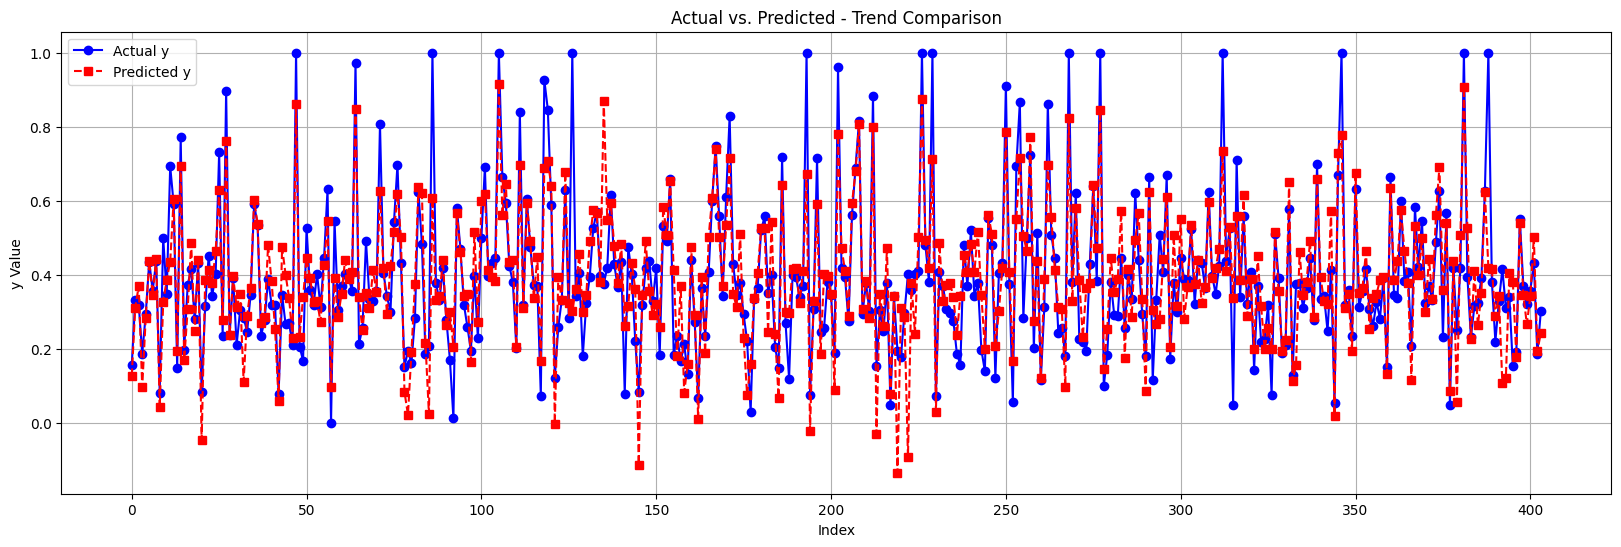

In [4]:
# Compute predicted y values
y_train_pred = X_train @ w  # Using the weight matrix w

plt.figure(figsize=(20, 6))
plt.plot(y_train, label="Actual y", marker="o", linestyle="-", color="blue")
plt.plot(y_train_pred, label="Predicted y", marker="s", linestyle="--", color="red")
plt.xlabel("Index")
plt.ylabel("y Value")
plt.title("Actual vs. Predicted - Trend Comparison")
plt.legend()
plt.grid(True)
plt.show()


## Data calculation for test set with weights w

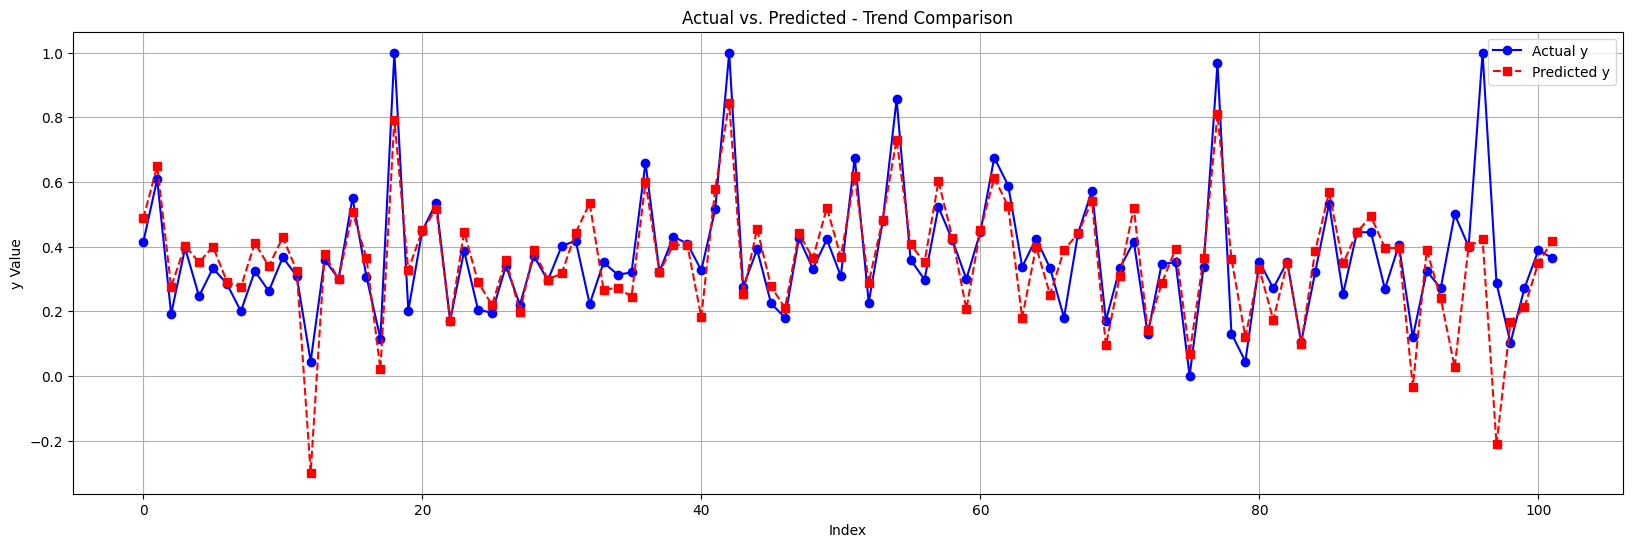

In [5]:
# Compute predicted y values
y_test_pred = X_test @ w  # Using the weight matrix w

plt.figure(figsize=(20, 6))
plt.plot(y_test, label="Actual y", marker="o", linestyle="-", color="blue")
plt.plot(y_test_pred, label="Predicted y", marker="s", linestyle="--", color="red")
plt.xlabel("Index")
plt.ylabel("y Value")
plt.title("Actual vs. Predicted - Trend Comparison")
plt.legend()
plt.grid(True)
plt.show()

# Training and Test Error in Machine Learning

### **Key Concept:**
Training error measures the fit on known data, while test error measures performance on unseen data.

### **Training (Empirical) Error:**
$$
J_{\text{train}}(w) = \frac{1}{n} \sum_{i=1}^{n} \left( y^{(i)} - h_w(x^{(i)}) \right)^2
$$

### **Test Error:**
$$
J_{\text{test}}(w) = \frac{1}{m} \sum_{i=1}^{m} \left( y_{\text{test}}^{(i)} - h_w(x_{\text{test}}^{(i)}) \right)^2
$$

### **Goal:** 
Minimize the test error to improve generalization.


In [6]:
def mean_squared_error(y_true, y_pred):
    """
    Compute Mean Squared Error (MSE)
    """
    return np.mean((y_true - y_pred) ** 2)


n = len(y_train)    # Number of training samples
m = len(y_train_pred)  # Number of test samples

# Calculate errors
J_train = mean_squared_error(y_train, y_train_pred)
J_test = mean_squared_error(y_test, y_test_pred)

print(f"Training Error = J_train: {J_train:.4f}")
print(f"Test Error = J_test: {J_test:.4f}")

Training Error = J_train: 0.0120
Test Error = J_test: 0.0155


## Understanding Model Performance Issues

Before proceeding with dimensionality reduction, let’s summarize two common issues in machine learning models:

### 1. Underfitting: Model Too Simple
- **Concept**: The model cannot capture the data's structure.
  - \($ J_{\text{train}}(\mathbf{w}) \approx J_{\text{test}}(\mathbf{w}) \gg 0 $\)
- **Causes**: Model lacks complexity, high bias.
- **Consequence**: Poor fit on both training and test data.

### 2. Overfitting: Model Too Complex
- **Concept**: The model fits training data well but fails on the test set.
  - \($ J_{\text{train}}(\mathbf{w}) \ll J_{\text{test}}(\mathbf{w}) $\)
- **Causes**: Model too complex, high variance.
- **Consequence**: Captures noise in training data, fails on unseen data.

**Relevance to Dimensionality Reduction**: PCA can help reduce overfitting by simplifying the feature space, potentially lowering variance while retaining essential patterns.